In [7]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['Churn'] = df['Churn'].str.strip()

In [10]:
df['Churn']=df['Churn'].map({'Yes':1, 'No':0})

In [11]:
df['Churn'].unique()
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [12]:
Churn_rate= df['Churn'].mean()
Churn_rate

np.float64(0.2653698707936959)

In [13]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [14]:
df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [15]:
df.groupby('InternetService')['Churn'].mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


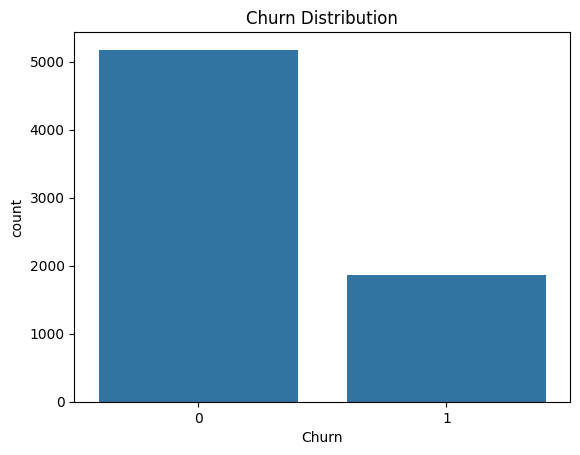

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

In [17]:
df['Churn'].mean()

np.float64(0.2653698707936959)

In [18]:
features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Contract'
]

df_ml = df[features + ['Churn']]
df_ml.head()

,tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,29.85,29.85,Month-to-month,0
1,34,56.95,1889.5,One year,0
2,2,53.85,108.15,Month-to-month,1
3,45,42.30,1840.75,One year,0
4,2,70.70,151.65,Month-to-month,1


In [19]:
df_ml = pd.get_dummies(df_ml, drop_first=True)
df_ml.head()

,tenure,MonthlyCharges,Churn,TotalCharges_100.2,TotalCharges_100.25,TotalCharges_100.35,TotalCharges_100.4,TotalCharges_100.8,TotalCharges_100.9,TotalCharges_1001.2,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Contract_One year,Contract_Two year
0,1,29.85,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,34,56.95,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2,53.85,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45,42.30,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2,70.70,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7995457126632595

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1158,  124],
       [ 229,  250]])

In [24]:
import pandas as pd

feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance

,0
TotalCharges_20.2,1.184670
TotalCharges_45.3,1.184433
TotalCharges_740.3,1.090749
TotalCharges_19.95,1.048279
TotalCharges_20.1,1.046845
...,...
TotalCharges_50.15,-0.773936
TotalCharges_151.75,-0.826364
TotalCharges_44,-0.840819
Contract_One year,-1.025503


In [25]:
df['Risk_Segment'] = 'Loyal'

df.loc[(df['Churn'] == 0) & (df['tenure'] < 12), 'Risk_Segment'] = 'Dormant'
df.loc[df['Churn'] == 1, 'Risk_Segment'] = 'At Risk'

df['Risk_Segment'].value_counts()

,count
Risk_Segment,
Loyal,4104
At Risk,1869
Dormant,1070
